## Dimensionality Reduction

In these slides we look at the dimensionality reduction algorithm known as PCA.

### What *is* dimensionality reduction? 

A simple example of dimensionality reduction is simply dropping irrelevant or redundant columns from the dataset.

But more sophisticated approaches *transform* the dataset so that it lives in a lower-dimensional subspace.

PCA is a dimensionality reduction technique in which the transformation is an orthogonal projection onto a subspace.

There are other techniques (some of them are non-linear). 


### Why reduce dimensionality?

Usually reducing dimensionality does not improve classifier/regression performance.

By "performance" we mean $R^2$ or accuracy, etc (the usual performance metrics).

#### Reason 1: speed

But reducing dimensionality **does** improve performance in 

        * Training time
        * Prediction time

#### Reason 2: visualization

Reducing dimensionality allows the visualization of high dimensional data. 

![img](bio.pca)

#### Reason 3: inherent dimensionality of the data

Sometimes the data naturally lives on or near a low dimensional sub-manifold of the input space.  

In this case the extra dimensions are not essential to the problem and may even be preventing learning.

Example: A 2-dimensional dataset in which all data actually live on or near a certain line. 

#### Reason 4: Information compression

Usually dimensionality reduction is a kind of "lossy" compression.  

That means that it saves space but loses information.

However in an ideal case the information that it loses is really "noise".

Sometimes doing PCA is an effective way to filter data (such as an image).

![img](noisePCA.ppm)


### Projections:  Principal Component Analysis (PCA)

This is a highly effective dimensionality reduction technique first proposed by Karl Pearson in 1901.

It is a projection method that simply projects the data onto a lower dimensional subspace. 


There are two equivalent points of view on how it basically works.

1) The $d$-dimensional data is projected onto the $k < d$ dimensional hyperplane such that the variance of the data under the projection is maximal.

2) The $d$-dimensional data is projected onto the $k <d$ dimensional hyperplane such that the mean squared distance between the dataset and the image points under the projection is minimal. 


A summary of (2):  PCA projects the $d$-dimensional data onto the "closest $d'$ dimensional hyperplane".

![img](geron1.png)

![img](geron2.png)

![alt](PCA_PML1.png)

![alt](PCA_PML2.png)

### Step 1: Scaling the data

We want to project onto a subspace -- subspaces go through the origin.

For this reason we want the mean of the data to be at the origin.

Variance is partly a function of scale.  

By scaling we "normalize out" the variation in the existing dimensions.

After the transformation, every feature of the data has mean=0 and variance=1. 


In [166]:
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00549/HortonGeneralHospital.csv")
df = df.drop("Unnamed: 0",axis=1) ## Drop ID 

df.head()

,Cardio,Resp,Hypo,Adm,year,month
0,1,0,0,413,1999,11
1,1,0,0,443,1999,12
2,1,0,0,378,2000,1
3,0,0,0,385,2000,2
4,1,0,0,388,2000,3


In [167]:
df.Hypo.value_counts()

0    127
1     12
Name: Hypo, dtype: int64

In [168]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=scaler.fit_transform(df)

X.var(axis=0),X.mean(axis=0)

(array([1., 1., 1., 1., 1., 1.]),
 array([ 1.34185229e-16,  2.55590912e-17,  0.00000000e+00, -2.55590912e-16,
        -1.51821002e-14,  2.87539776e-17]))

### Step 2: Construct the covariance matrix

Recall that the covariance of the feature $j$ and feature $k$ is given by the formula below.

This is basically the non-normalized correlation coefficient of the two columns.

![img](PCA_PML3.png)

The *covariance matrix* organizes the covariances of the features into a $d \times d$ matrix.

![img](covMat.png)

In [169]:
import numpy as np

Sigma = np.cov(X.T)
Sigma  ## A 6x6 matrix



array([[ 1.00724638e+00, -1.83859905e-02,  2.01587895e-01,
         9.04182745e-02, -1.36900504e-03, -3.72462651e-03],
       [-1.83859905e-02,  1.00724638e+00, -9.87664807e-04,
         1.41371346e-01, -1.73344437e-02,  6.76913683e-02],
       [ 2.01587895e-01, -9.87664807e-04,  1.00724638e+00,
         3.40541446e-02, -8.87109687e-02, -3.21654951e-02],
       [ 9.04182745e-02,  1.41371346e-01,  3.40541446e-02,
         1.00724638e+00,  4.49269733e-01,  1.55747969e-01],
       [-1.36900504e-03, -1.73344437e-02, -8.87109687e-02,
         4.49269733e-01,  1.00724638e+00, -1.01309634e-01],
       [-3.72462651e-03,  6.76913683e-02, -3.21654951e-02,
         1.55747969e-01, -1.01309634e-01,  1.00724638e+00]])

### Step 3: Get the eigenvectors and eigenvalues of the covariance matrix

Recall that by an *eigenvector* of $\Sigma$ we mean a vector ${\bf v}$ such that for some scalar $\lambda$,

$$\Sigma{\bf v}=\lambda {\bf v}$$

The scalar $\lambda$ is the *eigenvalue* of the eigenvector ${\bf v}$.

In general eigenvalues can be complex, but square symmetric real matrices (like $\Sigma$) always have real eigenvalues.

The eigenvectors of the covariance matrix represent the principal components.

They are the directions of maximum variance in the data.

The corresponding eigenvalues express the magnitude of the variance in the direction of the eigenvector.



In [170]:
eigenvalues, eigenvectors = np.linalg.eig(Sigma)
eigenvalues,eigenvectors

(array([0.4620462 , 1.48849378, 0.79374293, 0.94405986, 1.2249601 ,
        1.13017539]),
 array([[-0.06964063, -0.11226552,  0.70177251,  0.12528636,  0.68445356,
         -0.07673742],
        [-0.160263  , -0.20172137,  0.15593419, -0.77633499, -0.00508958,
          0.55370288],
        [-0.13811853,  0.02940609, -0.67819192, -0.13364452,  0.70843992,
         -0.01913914],
        [ 0.67325659, -0.7190641 , -0.11747727,  0.07734649,  0.065263  ,
          0.07503157],
        [-0.63821948, -0.64239446, -0.0553571 ,  0.01100652, -0.15919536,
         -0.38919986],
        [-0.29965094, -0.12695037, -0.07993922,  0.59803247,  0.0028084 ,
          0.72804664]]))

### Step 4: Sort the eigenvalues and eigenvectors

We sort the eigenvectors by the magnitude of the corresponding eigenvector.

This gives us a list of $k$ "principal components".

The eigenvector with the highest eigenvalue is the *first* **principal component**, the eigenvector with the second highest eigenvalue is the *second* principal component, *etc.*

In [171]:
abseigs = np.abs(eigenvalues)  ## we sort by magnitude, meaning absolute value
order = np.argsort(-abseigs)
order  ## this gives indexes in order of the magnitude of the entry

array([1, 4, 5, 3, 2, 0])

In [172]:
eigenvalues[order]  ## increasing order

array([1.48849378, 1.2249601 , 1.13017539, 0.94405986, 0.79374293,
       0.4620462 ])

In [173]:
principal_components = eigenvectors[:,order]
principal_components

array([[-0.11226552,  0.68445356, -0.07673742,  0.12528636,  0.70177251,
        -0.06964063],
       [-0.20172137, -0.00508958,  0.55370288, -0.77633499,  0.15593419,
        -0.160263  ],
       [ 0.02940609,  0.70843992, -0.01913914, -0.13364452, -0.67819192,
        -0.13811853],
       [-0.7190641 ,  0.065263  ,  0.07503157,  0.07734649, -0.11747727,
         0.67325659],
       [-0.64239446, -0.15919536, -0.38919986,  0.01100652, -0.0553571 ,
        -0.63821948],
       [-0.12695037,  0.0028084 ,  0.72804664,  0.59803247, -0.07993922,
        -0.29965094]])

### Step 5: Select k principal components

We select the principal components with the $k$ highest eigenvectors. 

For visualization, usually $k$ is 2. 

But $k$ is a free choice that depends on the application.

Here we plan to make a visual, so we will use $k=2$. 

### Step 6: Construct $W$

The matrix $W$ is a $d \times k$ matrix in which the first $k$ principal components are the columns.



In [174]:
W_2 = principal_components[:,:2]
W_2  ## The first two principal components are the columns of this matrix

array([[-0.11226552,  0.68445356],
       [-0.20172137, -0.00508958],
       [ 0.02940609,  0.70843992],
       [-0.7190641 ,  0.065263  ],
       [-0.64239446, -0.15919536],
       [-0.12695037,  0.0028084 ]])

### Step 7: Transform $X$

We transform the $d$-dimensional data $X$ using the matrix $W$ to get the $k$ dimensional projection of the data onto the first $k$ principal components.

In [175]:
X@W_2

array([[ 2.27293247e+00,  7.93686447e-02],
       [ 1.94052183e+00,  1.07042768e-01],
       [ 2.79077353e+00, -7.39656935e-03],
       [ 2.81742727e+00, -8.05660787e-01],
       [ 2.61936768e+00,  3.16878461e-03],
       [ 2.53747003e+00, -7.85243197e-01],
       [ 2.07522387e+00,  1.63426279e+00],
       [ 1.91947291e+00, -7.75643897e-01],
       [ 1.60679889e+00, -7.49761090e-01],
       [ 2.21058967e+00,  2.77908538e-02],
       [ 2.31840464e+00,  2.54747872e+00],
       [ 2.21075033e+00, -7.70564634e-01],
       [ 1.99295412e+00,  4.00562534e-02],
       [ 1.91711950e+00,  4.44432726e-02],
       [ 2.24815613e+00, -8.16220857e-01],
       [ 2.37955599e+00, -8.30642653e-01],
       [ 1.81636898e+00,  1.13262589e-02],
       [ 1.76248576e+00,  3.33903931e+00],
       [ 1.99415920e+00, -8.03151070e-01],
       [ 1.87885135e+00, -7.95181419e-01],
       [ 1.67694349e+00,  2.54596650e+00],
       [ 1.99964648e+00,  1.72083255e+00],
       [ 1.48358625e+00, -7.66794179e-01],
       [ 1.

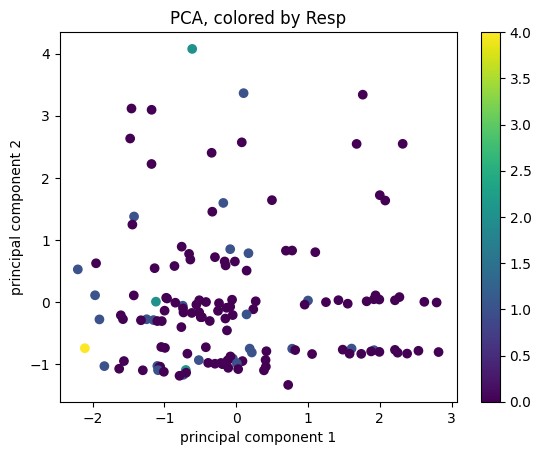

In [176]:
import matplotlib.pyplot as plt

prod = X@W_2
col = 1
name = df.columns[col]
plt.scatter(prod[:,0],prod[:,1],c=df.iloc[:,col])
plt.colorbar()
plt.title(f"PCA, colored by {name}")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

### Explained variance

The **explained variance ratio** of an eigenvector is defined to be

$$EVR(\lambda_j) = \frac{\lambda_j}{\sum_{i=1}^d \lambda_i}$$

Below we look at all the eigenvalues and their corresponding evr value.

We interpret this as say that (for example) the first 3 principal components capture about 65% of the information in the full-dimensional dataset. 

In [177]:
def evr(eig_val):
    return eig_val/sum(eigenvalues)

ratios = zip(eigenvalues[order],map(evr,eigenvalues[order]))
print("eigenval  explained variance ratio")
for r,ev in ratios:
    print(f"{r:8.2f} {ev:6.2f}")

eigenval  explained variance ratio
    1.49   0.25
    1.22   0.20
    1.13   0.19
    0.94   0.16
    0.79   0.13
    0.46   0.08


### Using PCA with `sklearn`

The `numpy` version of PCA we just computed was pretty easy.

But it is easier with the `sklearn` PCA object.


In [198]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)

X_pca[:5]

array([[ 2.27293247,  0.07936864],
       [ 1.94052183,  0.10704277],
       [ 2.79077353, -0.00739657],
       [ 2.81742727, -0.80566079],
       [ 2.61936768,  0.00316878]])

### Double check

Below we confirm that the library version of the transformed $X$ is the same as the homemade version.


In [185]:
library_version = sorted(X_pca,key = lambda x: x[0])
homemade_version = sorted(X@W_2,key = lambda x: x[0])

np.isclose(library_version,homemade_version).all()

True

### Under the hood with `sklearn` PCA

There are methods for retrieving the eigenvectors, the eigenvalues, and computing the explained variance ratios.

In [187]:
pca.components_ ## The eigenvectors/principal components in *row* form

array([[-0.11226552, -0.20172137,  0.02940609, -0.7190641 , -0.64239446,
        -0.12695037],
       [ 0.68445356, -0.00508958,  0.70843992,  0.065263  , -0.15919536,
         0.0028084 ]])

In [196]:
pca.explained_variance_ratio_  ## The eigenvalues divided by the sum of all eigenvalues

array([0.24629753, 0.20269124])

In [197]:
pca.explained_variance_  ## The eigenvalues

array([1.48849378, 1.2249601 ])